In [76]:
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import datetime
import platform
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
from tqdm import tqdm
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer as lemm, SnowballStemmer as stemm
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import ldamodel
from gensim.models.ldamodel import LdaModel
from gensim.models import Phrases
from gensim.models.wrappers import LdaMallet
import gensim.corpora;
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import FastText
from gensim.models import Word2Vec
import pyLDAvis.gensim; pyLDAvis.enable_notebook()
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import LatentDirichletAllocation
from statsmodels.tsa.stattools import grangercausalitytests
from operator import itemgetter
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.utils import check_random_state
from sklearn.decomposition._online_lda_fast import _dirichlet_expectation_2d
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import cosine_similarity
import pyLDAvis.sklearn
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import tensorflow.compat.v1 as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
from keras.layers import Dense, LSTM
import pickle, string, re, time, os, io
from pprint import pprint
import base64
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')
sns.set_context('poster')

%watermark -a 'Hanif' -d -t -v -p numpy,pandas,matplotlib,plotly,gensim,nltk,sklearn
system_info = platform.platform()
print(system_info)
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))
print(device_lib.list_local_devices())

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Author: Hanif

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.29.0

numpy     : 1.19.5
pandas    : 1.3.4
matplotlib: 3.5.0
plotly    : 5.4.0
gensim    : 3.8.3
nltk      : 3.4.5
sklearn   : 0.0

Windows-10-10.0.19043-SP0
Num of GPUs available:  0


[nltk_data] Downloading package punkt to C:\Users\Hanif Kamil.DESKTOP-
[nltk_data]     PIS7G8D\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4075030315630788408
]


In [77]:
# # Loading the data
start = time.time()
df = pd.read_csv("E:/dataset/indonesian_tweet_about_teroris.csv", error_bad_lines=True)
start
df.head()

,tweet id,name,username,tweet text,reference type,reference id,created at,like,quote,reply,retweet,tweet url,mentions,hashtags
0,1467687742356131847,sigarantang,endinburhanudin,@alisyarief Yang disebut teroris ia komplotan ...,replied_to,1.467646e+18,2021-12-06T02:50:00.000Z,0,0,0,0,https://twitter.com/endinburhanudin/status/146...,@alisyarief,NaN
1,1467687491243184130,TEDJA WOELOENG,TedjaWoeloeng,"Pak @prabowo, hanya pada bapaklah saya berhara...",original,NaN,2021-12-06T02:49:00.000Z,1,0,0,0,https://twitter.com/TedjaWoeloeng/status/14676...,@prabowo,NaN
2,1467687322586005508,Alap² Lautan Teduh,Alap2T,@s_soediro Kok darahnya ga mendidih yaa ?\r\nM...,replied_to,1.467656e+18,2021-12-06T02:48:20.000Z,0,0,0,0,https://twitter.com/Alap2T/status/146768732258...,@s_soediro,NaN
3,1467687235919101954,juragan ikan,kaki_fluffy,@THEKAMPRET10 lah 🤣 gak merasa sweeping salah?...,replied_to,1.467666e+18,2021-12-06T02:48:00.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467687...,@THEKAMPRET10,NaN
4,1467686839121186819,juragan ikan,kaki_fluffy,@wir0_ketandan @THEKAMPRET10 @elfariidd @y03_n...,replied_to,1.467672e+18,2021-12-06T02:46:25.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467686...,"@wir0_ketandan,@THEKAMPRET10,@elfariidd,@y03_n4n4",NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet id        77580 non-null  int64  
 1   name            77578 non-null  object 
 2   username        77580 non-null  object 
 3   tweet text      77580 non-null  object 
 4   reference type  77580 non-null  object 
 5   reference id    56393 non-null  float64
 6   created at      77580 non-null  object 
 7   like            77580 non-null  int64  
 8   quote           77580 non-null  int64  
 9   reply           77580 non-null  int64  
 10  retweet         77580 non-null  int64  
 11  tweet url       77580 non-null  object 
 12  mentions        49594 non-null  object 
 13  hashtags        15143 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 8.3+ MB


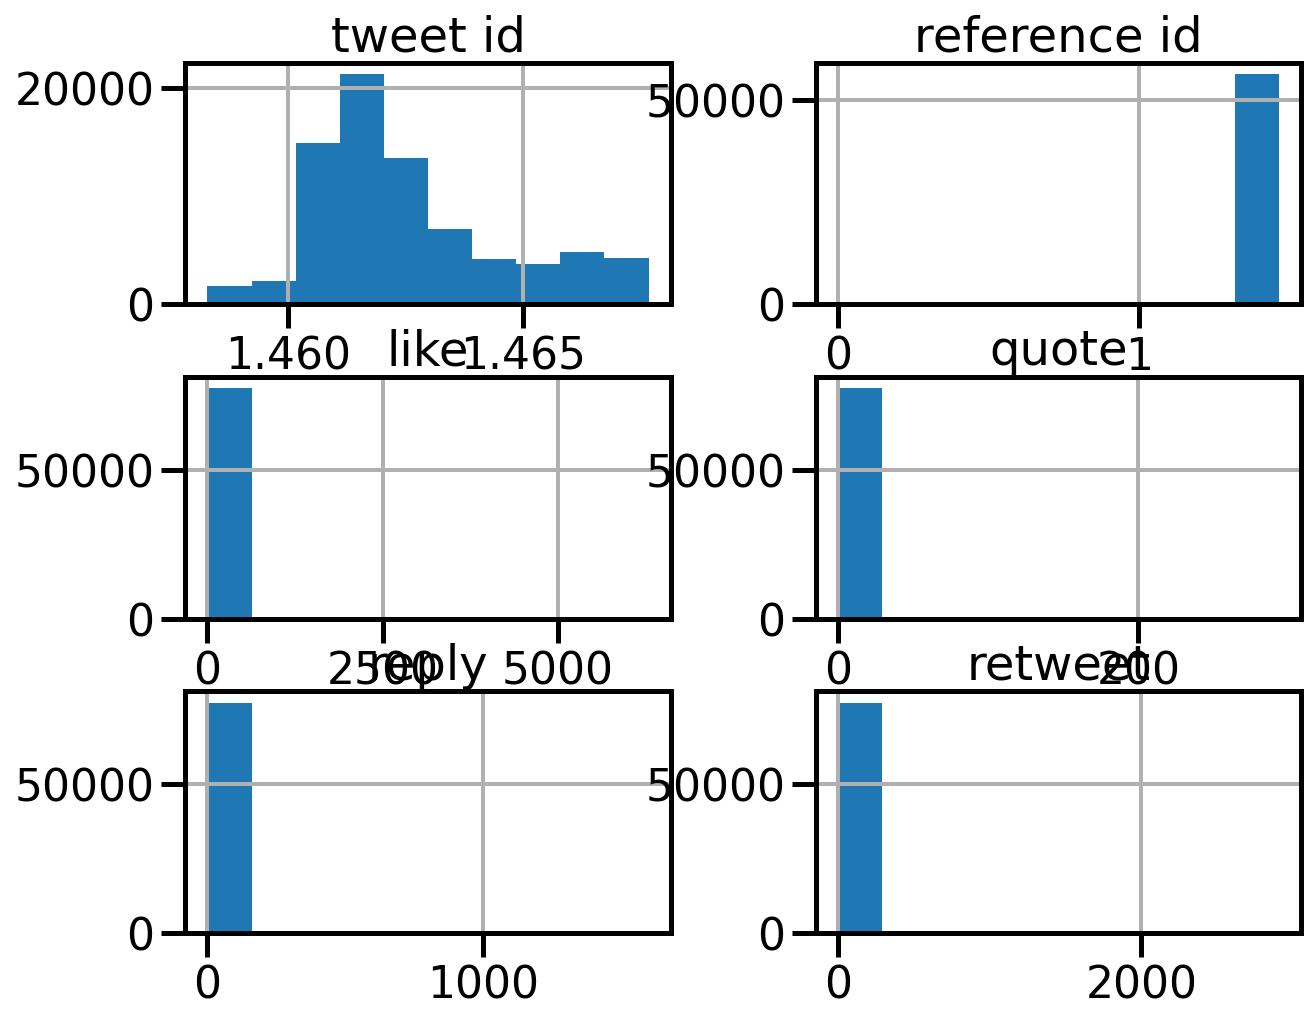

In [82]:
df.hist(figsize=(10,8))
plt.show()

In [71]:
df['text'] = df['tweet text']

In [72]:
df = df[['name', 'like', 'text', 'hashtags']]
df.text.fillna('', inplace=True)
df['text'] = df['text'].map(str) + ' ' + df['hashtags']
df.dropna(inplace=True)
df = df.sort_values(by=['like'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15143 entries, 56920 to 77564
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      15143 non-null  object
 1   like      15143 non-null  int64 
 2   text      15143 non-null  object
 3   hashtags  15143 non-null  object
dtypes: int64(1), object(3)
memory usage: 591.5+ KB


In [73]:
df

,name,like,text,hashtags
56920,MUSTOFA NAHRAWARDAYA,3834,"Kalau dia niat dirinya mau jadi teroris, pasti...",dukungMUI
14195,Denny siregar,3642,"Ketika tagar #bubarkanDensus marak, gua udah n...",bubarkanDensus
53540,Hilmi Firdausi,3431,Saking kesalnya buzzer sama sy gegara tagar #d...,dukungMUI
60710,KM3,2928,Ditangkap trus dicap teroris.\r\nSetelah 6 bul...,dukungMUI
45779,Habib_Nabiel_Almusawa,2711,Smg ALLAAH menjaga para Ulama &amp; Majelis ny...,kamibersamaMUI
...,...,...,...,...
28729,Sektor.cisurupan,0,Polri Tangkap 3 Tersangka Yang Terlibat Pendan...,PolriCepatResponsif
28738,eskuwel,0,Nah bahkan Ketiganya diduga berperan dalam lem...,PolriCepatResponsif
28739,polresserangkota,0,Polri Ungkap Keterlibatan Tersangka Pada Penda...,PolriCepatResponsif
28740,Gian,0,POLRI AMANKAN 3 TERSANGKA YANG TERLIBAT PENDAN...,PolriCepatResponsif


In [12]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopwords.words('indonesian')]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['text']))
len(norm_corpus)

15143

In [14]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf_matrix = tfidf.fit_transform(norm_corpus)
tfidf_matrix.shape

(15143, 23625)

In [15]:
doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15133,15134,15135,15136,15137,15138,15139,15140,15141,15142
0,1.000000,0.000998,0.027187,0.042610,0.003978,0.030601,0.024445,0.027491,0.057341,0.001482,...,0.003499,0.003499,0.002895,0.001820,0.003460,0.002003,0.001984,0.001633,0.004000,0.002367
1,0.000998,1.000000,0.021558,0.000588,0.008641,0.036203,0.000483,0.007658,0.000792,0.006987,...,0.001077,0.001077,0.000891,0.009389,0.001065,0.010335,0.000610,0.000503,0.001231,0.000728
2,0.027187,0.021558,1.000000,0.032817,0.026145,0.109750,0.001083,0.035910,0.044163,0.008342,...,0.002414,0.002414,0.001997,0.001256,0.002387,0.001382,0.001368,0.001127,0.002759,0.001633
3,0.042610,0.000588,0.032817,1.000000,0.000559,0.052018,0.000926,0.046731,0.098435,0.000874,...,0.002064,0.002064,0.001708,0.014570,0.002041,0.001182,0.001170,0.000964,0.002359,0.001396
4,0.003978,0.008641,0.026145,0.000559,1.000000,0.000529,0.000459,0.022865,0.000752,0.020862,...,0.010498,0.010498,0.026613,0.010391,0.010381,0.011437,0.010853,0.004901,0.012001,0.000692


In [16]:
radicalism_list = df['hashtags'].values
radicalism_list, radicalism_list.shape

(array(['dukungMUI', 'bubarkanDensus', 'dukungMUI', ...,
        'PolriCepatResponsif', 'PolriCepatResponsif', 'Berita9'],
       dtype=object),
 (15143,))

In [17]:
radicalism_idx = np.where(radicalism_list == 'Reuni212')[0][0]
radicalism_idx

115

In [18]:
radicalism_similarities = doc_sim_df.iloc[radicalism_idx].values
radicalism_similarities

array([0.00167034, 0.00051409, 0.00115233, ..., 0.00084176, 0.00206103,
       0.00121951])

In [19]:
similar_radicalism_idxs = np.argsort(-radicalism_similarities)[1:6]
similar_radicalism_idxs

array([ 884, 5698, 5571, 5681,  150], dtype=int64)

In [20]:
similar_radicalism = radicalism_list[similar_radicalism_idxs]
similar_radicalism

array(['Reuni212', 'Reuni212', 'Reuni212', 'Reuni212', 'Reuni212'],
      dtype=object)

In [21]:
def radicalism_recommender(radicalism_title, radicalism=radicalism_list, doc_sims=doc_sim_df):
    # find movie id
    radicalism_idx = np.where(radicalism == radicalism_title)[0][0]
    # get movie similarities
    radicalism_similarities = doc_sims.iloc[radicalism_idx].values
    # get top 5 similar movie IDs
    similar_radicalism_idxs = np.argsort(-radicalism_similarities)[1:6]
    # get top 5 movies
    similar_radicalism = radicalism[similar_radicalism_idxs]
    # return the top 5 movies
    return similar_radicalism

In [22]:
popular_radicalism = ['Reuni212', 'AksiSuperDamai212', 'bubarkanMUI', 'BubarknReuniKadrun212', 'saudarateroris',
                      'PapuaIndonesia', 'MUISarangTeroris', 'KamiBersamaDensus88', 
                      'dukungMUI', 'MUIbersamaDensus', 'PDIPPengkhianatPancasila', 'BaharBinSmith', 
                      'PolriCepatResponsifn', 'Teroris', 'Densus88HarusDibubarkan', 'AniesDipusaranTokohTeroris',  
                      'PKIGayaBaru', 'BuzzeRpSahabatTeroris', 'aniesbaswedan','Islamophobia']

In [23]:
for popular in popular_radicalism:
    print('Popular:', popular)
    print('Top 5 recommended popular hashtags:', radicalism_recommender(radicalism_title=popular,
                                                                        radicalism=radicalism_list, doc_sims=doc_sim_df))
    print()

Popular: Reuni212
Top 5 recommended popular hashtags: ['Reuni212' 'Reuni212' 'Reuni212' 'Reuni212' 'Reuni212']

Popular: AksiSuperDamai212
Top 5 recommended popular hashtags: ['AksiSuperDamai212' 'AksiSuperDamai212' 'AksiSuperDamai212'
 'cocotmudiam,matamubuta,cocotmurusak,matamumlotot' 'AksiSuperDamai212']

Popular: bubarkanMUI
Top 5 recommended popular hashtags: ['bubarkanMUI' 'bubarkanMUI' 'OrdeBobrok,OrdeBobrok'
 'bubarkanMUI,BubarkanMUISarangTeroris' 'bubarkanMUI']

Popular: BubarknReuniKadrun212
Top 5 recommended popular hashtags: ['BubarknReuniKadrun212,BubarknReuniKadrun212'
 'BubarknReuniKadrun212,BubarknReuniKadrun212,BubarknReuniKadrun212,BubarknReuniKadrun212'
 'bubarkanMUI,bubarkanMUI,bubarkanMUI' 'bubarkanMUI' 'bubrkanMUI']

Popular: saudarateroris
Top 5 recommended popular hashtags: ['PutihkanJakarta212' 'LawanTerorTerhadapIslam'
 'DUDUNGDUNGU,DUDUNGTOLOL,REZIMPKISIAPSIAPHANCUR' 'dukungMUI,dukungMUI'
 'PKITakutIslamBersatu,PKITakutIslamBersatu']

Popular: PapuaIndonesia


IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
tokenized_docs = [doc.split() for doc in norm_corpus]
ft_model = Word2Vec(tokenized_docs, size=300, window=30, min_count=2, workers=4, sg=1, iter=50)

In [25]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [26]:
doc_vecs_ft = averaged_word2vec_vectorizer(tokenized_docs, ft_model, 300)
doc_vecs_ft.shape

(15143, 300)

In [27]:
doc_sim = cosine_similarity(doc_vecs_ft)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15133,15134,15135,15136,15137,15138,15139,15140,15141,15142
0,1.000000,0.510565,0.513522,0.521302,0.463062,0.420186,0.515004,0.514470,0.505273,0.439425,...,0.379024,0.379024,0.403449,0.412883,0.344957,0.406204,0.399972,0.379831,0.370206,0.429738
1,0.510565,1.000000,0.531805,0.501041,0.454366,0.498840,0.380937,0.497782,0.465095,0.340330,...,0.348945,0.348945,0.386767,0.419551,0.357917,0.395573,0.353880,0.373029,0.339162,0.393232
2,0.513522,0.531805,1.000000,0.529939,0.491390,0.565410,0.399645,0.543882,0.477734,0.439706,...,0.331772,0.331772,0.362094,0.370034,0.294349,0.362402,0.388469,0.356942,0.321490,0.370761
3,0.521302,0.501041,0.529939,1.000000,0.390852,0.534989,0.408520,0.536358,0.573078,0.420425,...,0.365166,0.365166,0.383348,0.431278,0.345561,0.403606,0.312795,0.351425,0.357758,0.350568
4,0.463062,0.454366,0.491390,0.390852,1.000000,0.415732,0.423602,0.559832,0.439846,0.431201,...,0.428865,0.428865,0.478804,0.477472,0.420486,0.456838,0.455463,0.449302,0.422534,0.414952


In [28]:
for popular in popular_radicalism:
    print('Popular:', popular)
    print('Top 5 recommended popular hashtags:', radicalism_recommender(radicalism_title=popular,
                                                                        radicalism=radicalism_list,
                                                                        doc_sims=doc_sim_df))
    print()

Popular: Reuni212
Top 5 recommended popular hashtags: ['Reuni212' 'Reuni212' 'Reuni212' 'Reuni212' 'Reuni212']

Popular: AksiSuperDamai212
Top 5 recommended popular hashtags: ['AksiSuperDamai212' 'AksiSuperDamai212'
 'cocotmudiam,matamubuta,cocotmurusak,matamumlotot' 'AksiSuperDamai212'
 'AksiSuperDamai212']

Popular: bubarkanMUI
Top 5 recommended popular hashtags: ['bubarkanMUI' 'bubarkanMUI' 'AnwarAbbas' 'bubarkanMUI'
 'bubarkanMUI,BubarkanMUISarangTeroris']

Popular: BubarknReuniKadrun212
Top 5 recommended popular hashtags: ['BubarknReuniKadrun212,BubarknReuniKadrun212,BubarknReuniKadrun212,BubarknReuniKadrun212'
 'BubarknReuniKadrun212,BubarknReuniKadrun212' 'bubarkanMUI,MUIcumaLSM'
 'bubarkanMUI' 'bubarkanMUI,BubarkanMUIsegera,MUISarangTeroris,MUIcumaLSM']

Popular: saudarateroris
Top 5 recommended popular hashtags: ['LawanTerorTerhadapIslam' 'JumatBerkah'
 'DUDUNGDUNGU,DUDUNGTOLOL,REZIMPKISIAPSIAPHANCUR'
 'MakzulkanJokowiPembenciIslam,MakzulkanJokowiPembenciIslam'
 'PKITakutIslam

IndexError: index 0 is out of bounds for axis 0 with size 0

In [30]:
import tensorflow.compat.v1 as tf

<h2>Here we will be leveraging the pre-trained ELMo model as a feature extractor and extract document level 1024-sized embeddings</h2>

In [34]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=False)

In [35]:
sample_desc = df.iloc[0]['text']
sample_desc

'Kalau dia niat dirinya mau jadi teroris, pastinya lebih aman bersembunyi. Ngebom tiap hari. Nembaki aparat dari kegelapan. Ngapain teroris rekaman di youtube tiap hari? Repot-repot jadi pengurus MUI segala. Bantu dana teroris? Emang seberani itu? pakai akal! #dukungMUI dukungMUI'

In [38]:
embeddings = elmo([sample_desc], signature="default", as_dict=True)["elmo"]
embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([1, 40, 1024])

In [57]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embeddings)
    
message_embeddings.shape

(2, 40, 1024)

In [59]:
def embed_elmo2(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

embed_fn = embed_elmo2('https://tfhub.dev/google/elmo/2')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [61]:
embed_fn(["dukung MUI"]).shape

(1, 1024)

In [62]:
with tf.Session() as sess:
    embeddings = elmo([sample_desc, 'hkekerasa'], signature="default", as_dict=True)["elmo"]
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    a = (sess.run(tf.reduce_mean(embeddings,1)))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [63]:
def get_elmo_embeddings(docs, batch_size=32):
  elmo_embeddings = []
  i = 0
  total_docs = len(docs)
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    while i < total_docs:
      i_new = i + batch_size
      if i_new < len(docs):
        embeddings = elmo(docs[i:i_new], signature="default", as_dict=True)["elmo"]
      else:
        embeddings = elmo(docs[i:], signature="default", as_dict=True)["elmo"]
      i = i_new
      elmo_embeddings.append(sess.run(tf.reduce_mean(embeddings,1)))
    return np.concatenate(elmo_embeddings, axis=0)

In [65]:
elmo_embeddings = get_elmo_embeddings(norm_corpus, batch_size=128)
elmo_embeddings.shape
def embed_elmo(module):
    with tf.Graph().as_default():
        sentences = tf.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})

embed_fn = embed_elmo('https://tfhub.dev/google/elmo/2')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [66]:
doc_sim = cosine_similarity(elmo_embeddings)
doc_sim_df = pd.DataFrame(doc_sim)
doc_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15133,15134,15135,15136,15137,15138,15139,15140,15141,15142
0,1.000000,0.961720,0.943541,0.933078,0.953548,0.958907,0.939035,0.945982,0.900532,0.957294,...,0.922879,0.922879,0.923121,0.944530,0.911388,0.933320,0.948500,0.947416,0.912527,0.889984
1,0.961720,1.000000,0.944772,0.920742,0.955266,0.945610,0.919379,0.943446,0.873450,0.947267,...,0.910074,0.910074,0.919126,0.938618,0.896037,0.944116,0.952642,0.945134,0.906723,0.876394
2,0.943541,0.944772,1.000000,0.903765,0.955877,0.897310,0.917158,0.904144,0.837909,0.937569,...,0.869820,0.869820,0.893641,0.934557,0.877264,0.940209,0.942057,0.944814,0.883898,0.843734
3,0.933078,0.920742,0.903765,1.000000,0.896265,0.932743,0.913085,0.919512,0.930887,0.921783,...,0.912286,0.912286,0.916232,0.902967,0.910470,0.890749,0.896446,0.898097,0.923278,0.914271
4,0.953548,0.955266,0.955877,0.896265,1.000000,0.917211,0.926372,0.929664,0.845408,0.945165,...,0.887628,0.887628,0.904870,0.938565,0.890505,0.952542,0.966495,0.959322,0.891918,0.846833


In [67]:
for popular in popular_radicalism:
    print('Popular:', popular)
    print('Top 5 recommended popular hashtags:', radicalism_recommender(radicalism_title=popular,
                                                                        radicalism=radicalism_list,
                                                                        doc_sims=doc_sim_df))
    print()

Popular: Reuni212
Top 5 recommended popular hashtags: ['Papua,WestPapua,PapuaIndonesia,papuaviral,OPM,KKB_KelompokTeroris,KST,separatis,teroris'
 'dukungMUI,dukungMUI,pedeipehbubarkan'
 'BravoDensus88,TolakReuniKadrun212,LanjutkanVaksinasi'
 'PolriCepatResponsif' 'seriusNanya']

Popular: AksiSuperDamai212
Top 5 recommended popular hashtags: ['AksiSuperDamai212' 'AksiSuperDamai212' 'KKBGangguPembangunanPapua'
 'dukungMUI,StopWacanaBubarkanMUI' 'CakImin,TerorisKKB,TNI']

Popular: bubarkanMUI
Top 5 recommended popular hashtags: ['DUKUNGDENSUS88,BUBARKANMUI' 'bubarkanMUI' 'PapuaIndonesia,jkrb'
 'bubarkanMUI' 'bubarkanMUI,BubarkanMUISarangTeroris']

Popular: BubarknReuniKadrun212
Top 5 recommended popular hashtags: ['teroris' 'radikal,teroris,isis' 'Tangkap' 'GerakanAksiBelaUlama'
 'MUIdukungDensus88']

Popular: saudarateroris
Top 5 recommended popular hashtags: ['agama_preman' 'KoranTempo' 'MakzulkanJokowiPembenciIslam' 'ProxyChina'
 'SaminaWaathonaIBHRS']

Popular: PapuaIndonesia
Top 5 re

IndexError: index 0 is out of bounds for axis 0 with size 0

In [81]:
x = datetime.datetime.now()
print(x)

2021-12-08 05:33:06.806906


<h2>Here I deliberately did not set the index so that there are still a few errors even though some of the output has been shown. Actually I want to repeat again and set the index, but it takes a long time to calculate the similarity of the "text" column.</h2>